In [3]:
# Pre-reqs and libraries to import
import sys
sys.path.append('C:\\Users\\James\\Desktop\\RoboticsJourney\\Self_Study\\2.PatternReg.ML\\introduction_to_ml_with_python')
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Unsupervised Learning and Preprocessing

- Unsupervised learning subsumes all kinds of machine learning where there is no known output, no teacher to instruct the learning algorithm.  
- In unsupervised learning, the learning algorithm is just shown the input data and asked to extract knowledge from this data.

### Challenges in Unsupervised Learning
1. Evaluating if the algorithm learned something useful
2. The dataset is usually un-labelled
3. There is no way to tell the algorithm what we are looking for
4. Usually a manual inspection of data to determine results
5. Often used in exploratory setting to understand the data better
6. Preprocessing for use on a Supervised Algorithm
   1. Results in lower time and compute 
   2. Improve accuracy 

#### Unsupervised Transformations

1. Used for reducing the numbers of features in a dataset
   1. Good for visualisation, and then using a Supervised Algorithm
   2. Known as dimensionality reduction, down to two features for visualising 
   3. Also used for finding components of what makes up the data set 
   4. "Topic Extraction" - finding the unknown topics discussed in a document
      1. Learning what the topics are: eg:
         1. elections / gun control / pop stars on social media




#### Clustering Algorithms

1. Partition the data into distinct groups
2. Photos - grouping photos of the same person

### Preprocessing and Scaling

- The previous chapter explained how Neural Networks and SVMs are sensitive to the scaling of data 
- Common practice is to adjust the features so data representation is suitable for these algorithms
- Example below of a rescaling and shift of data
- They're plotting the different Transformations we can apply to datasets

In [ ]:
mglearn.plots.plot_scaling()

- The above shows different ways we can scale and preprocess data
- Synthetic two-class classification dataset with two features.
  - The first feature (the x-axis value) is between 10 and 15. 
  - The second feature (the y-axis value) is between around 1 and 9
  - 
1. StandardScaler in scikit-learn ensures that for each feature the mean is 0 and the variance is 1, bringing all features to the same magnitude.
     - However, this scaling does not ensure any particular minimum and maximum values for the features

2. RobustScaler works similarly to the StandardScaler in that it ensures statistical properties for each feature that guarantee that they are on the same scale. 
     - However, the RobustScaler uses the median and quartiles,1 instead of mean and variance. This makes the RobustScaler ignore data points that are very different from the rest (like measurement errors).
     - These odd data points are also called outliers, and can lead to trouble for other scaling techniques

3. The MinMaxScaler, on the other hand, shifts the data such that all features are exactly between 0 and 1. 
     - For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis between 0 and 1.

4. Normalizer does a very different kind of rescaling. It scales each data point such that the feature vector has a Euclidean length of 1. 
     - In other words, it projects a data point on the circle (or sphere, in the case of higher dimensions) with a radius of 1.
     - This means every data point is scaled by a different number (by the inverse of its length). 
     - This normalization is often used when only the direction (or angle) of the data matters, not the length of the feature vector

## Applying Data Transformations

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=1)

print(X_train.shape)
print(X_test.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) # The fit method computes the min and max values for each feature, note that y_train isn't used.
X_train_scaled = scaler.transform(X_train) # To actually transform the data

(426, 30)
(143, 30)


In [6]:
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# To apply the SVM to the scaled data, we also need to transform the test set. This is again done by calling the transform method, this time on X_test:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


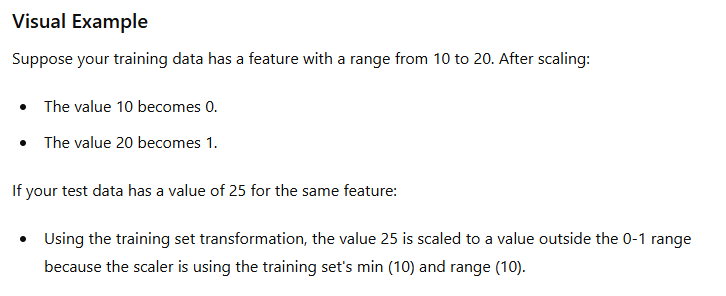
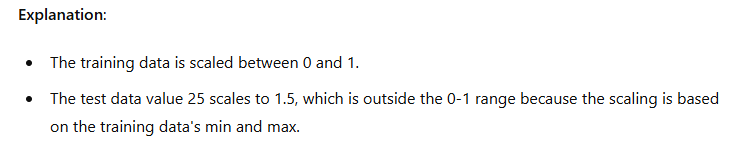

### Scaling Training and Test Data the same way

C:\Users\James\AppData\Local\Temp\ipykernel_25448\4157877262.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
C:\Users\James\AppData\Local\Temp\ipykernel_25448\4157877262.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
C:\Users\James\AppData\Local\Temp\ipykernel_25448\4157877262.py:20: UserWarning: *c* argument looks

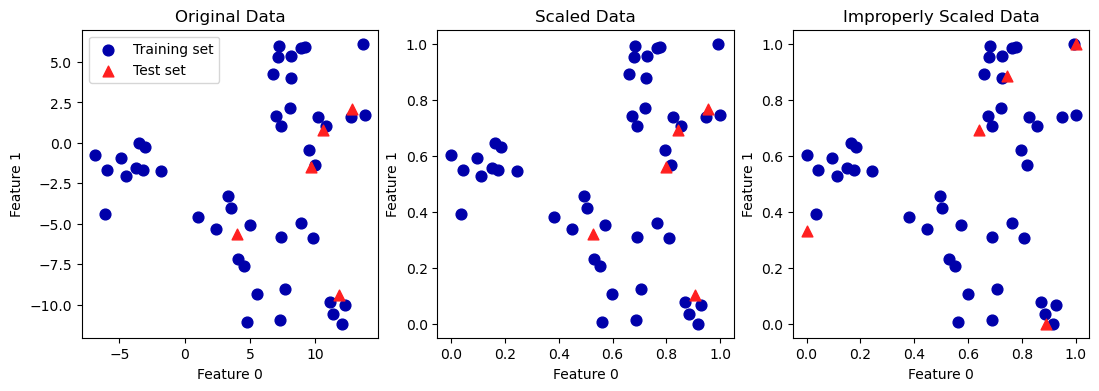

In [8]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")
# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

#### Shortcuts and efficient alternatives

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

### The effect of preprocessing on Supervised Learning

In [10]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))


Test set accuracy: 0.94
Scaled test set accuracy: 0.97


In [11]:
## Using a different Scaling preprocessing algorithm - page 139
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


## Dimensionality Reduction, Feature Extraction, and Manifold Learning

- Transforming data using unsupervised learning has many motivations
- Motivations are for visualization, compressing the data, and finding a representation that is more informative for further processing
- PCA: Principal Component Analysis: one of the simplest and most widely used algorithms for all of these is . 
- NMF: Non-negative matrix factorization: which is commonly used for feature extraction, 
- t-SNE: is commonly used for visualization using two-dimensional scatter plots.

#### PCA - Principle Component Analysis 

#### !! I don't really understand this lol page 140

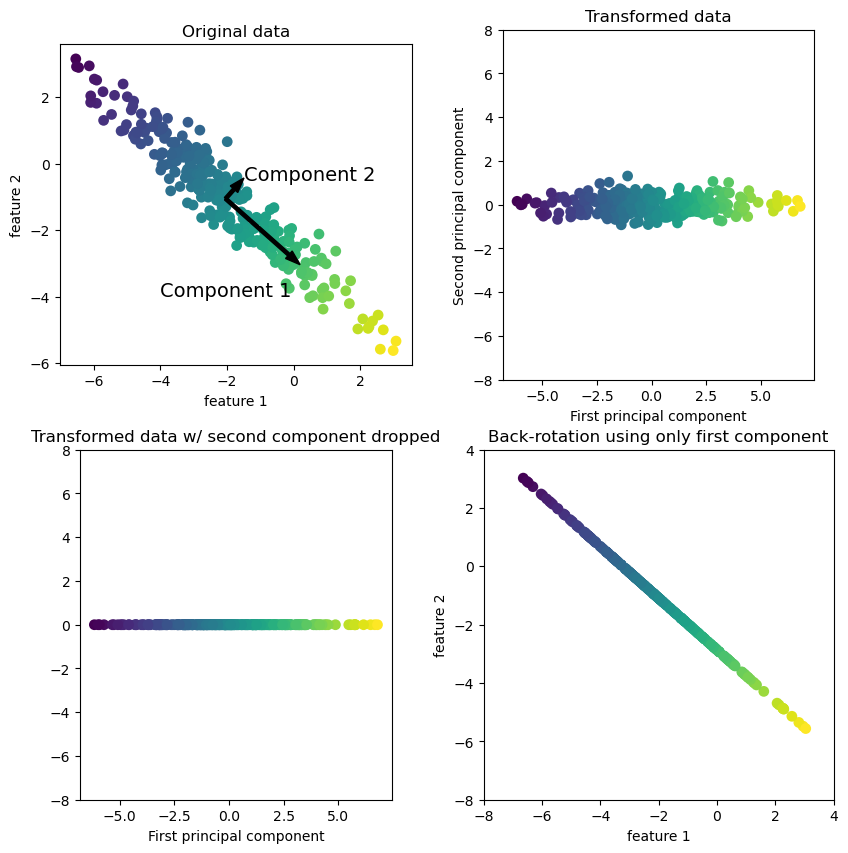

In [12]:
mglearn.plots.plot_pca_illustration()

The second plot (top right) shows the same data, but now rotated so that the first principal component aligns with the x-axis and the second principal component aligns with the y-axis

### Applying PCA to the cancer dataset for visualization

For the Iris dataset, we were able to create a pair plot (Figure 1-3 in Chapter 1) that gave us a partial picture of the data by showing us all the possible combinations of two features.  

But if we want to look at the Breast Cancer dataset, even using a pair plot is tricky. This dataset has 30 features, which would result in 30 * 14 = 420 scatter plots!  

We’d never be able to look at all these plots in detail, let alone try to understand them.  

There is an even simpler visualization we can use, though—computing histograms of each of the features for the two classes, benign and malignant cancer (Figure 3-4):

In [ ]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"], loc="best")
    fig.tight_layout()

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Original shape: (569, 30)
Reduced shape: (569, 2)
PCA component shape: (2, 30)


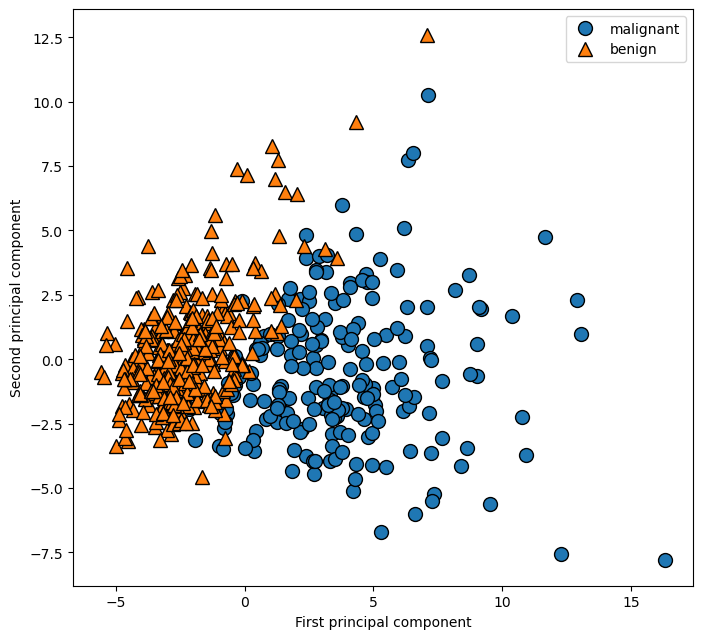

In [17]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
print("PCA component shape: {}".format(pca.components_.shape))

We can also visualize the coefficients using a heat map (Figure 3-6), which might be easier to understand

Text(0, 0.5, 'Principal components')

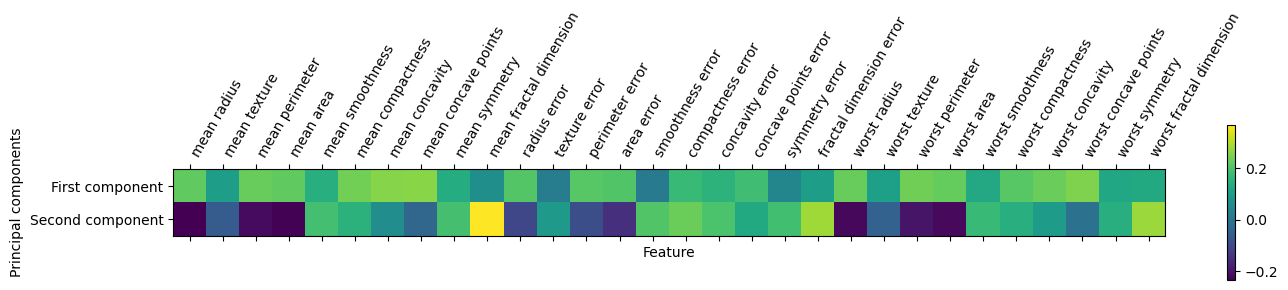

In [18]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Eigenfaces for feature extraction
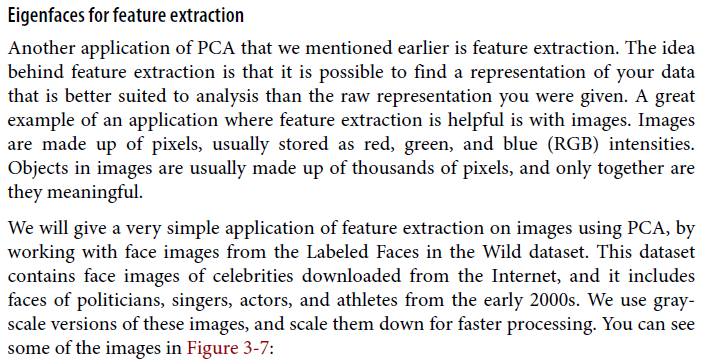

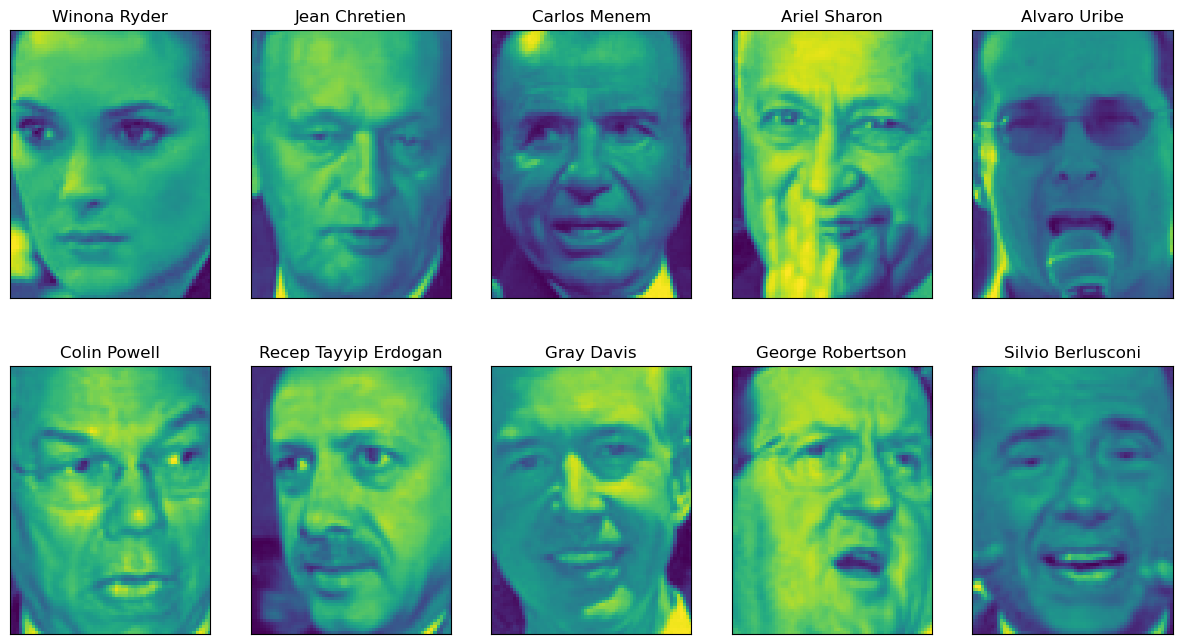

In [19]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [21]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


- The dataset is a bit skewed, however, containing a lot of images of George W. Bush and Colin Powell, as you can see here:

In [24]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()   

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [26]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.     

C:\Users\James\AppData\Local\Temp\ipykernel_25448\696523766.py:1: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros(people.target.shape, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations